In [64]:
from pyerr import ErrorrOutput
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# path to tape28 file for U235 ENDF-7.1
fle = "tape28"

create `ErrorrOutput` object without energy limits

In [66]:
output = ErrorrOutput(fle)

for PFNS, need to look at MT (section) 18, which is fission

In [67]:
output.sections.keys()

dict_keys([18])

which is the only MT in this NJOY calculation anyway

In [68]:
pfns = output.sections[18]

`pfns` is now a Section object

In [69]:
pfns

the doc string lists the attributes and methods

In [70]:
help(pfns)

Help on Section in module pyerr._section object:

class Section(builtins.object)
 |  Section(energy_lines, mean_lines, covariance_lines, lower_limit=None, upper_limit=None)
 |  
 |  Class to hold a single section (MT value) from an ERRORR file, which includes
 |  the energy grid, the mean value, and the covariance matrix
 |  
 |  Parameters
 |  ----------
 |  energy_lines : list
 |      list of the lines from the file corresponding to the energy grid
 |  
 |  mean_lines : list
 |      list of the lines from the file corresponding to the mean values
 |  
 |  covariance_lines : list
 |      list of the lines from the file corresponding to the covariance
 |  
 |  lower_limit : float, optional, default is None
 |      the lower limit in energy (eV) to cut the values at. If not given, uses the lower 
 |      limit of the matrix in the file. If given, will cut out groups below the lower 
 |      limit. If the lower limit falls within a group, that group is kept
 |  
 |  
 |  upper_limit : fl

the MAT, MF, and MT values are on the section

In [71]:
pfns.MAT, pfns.MF, pfns.MT

(9228, 5, 18)

the incident energy representing the group (called `efmean`).

In [72]:
f"{pfns.incident_energy/1e6} MeV"

'0.25 MeV'

The PFNS itself is in the `mean_values` attribute

In [73]:
pfns.mean_values

array([1.313262e-08, 4.218382e-09, 4.531685e-09, 4.824643e-09,
       5.100774e-09, 5.362685e-09, 5.612374e-09, 5.851407e-09,
       6.081045e-09, 6.302315e-09, 6.516070e-09, 6.723029e-09,
       6.923801e-09, 7.118910e-09, 7.308812e-09, 7.493900e-09,
       7.674523e-09, 7.850990e-09, 8.023577e-09, 8.192528e-09,
       8.358062e-09, 8.520381e-09, 8.679664e-09, 8.836076e-09,
       8.989764e-09, 9.140869e-09, 9.289516e-09, 9.435820e-09,
       9.579891e-09, 9.721826e-09, 9.861718e-09, 9.999652e-09,
       1.013571e-08, 1.026996e-08, 1.040249e-08, 1.053334e-08,
       1.066259e-08, 1.079029e-08, 1.091649e-08, 1.104125e-08,
       1.116462e-08, 1.128664e-08, 1.140735e-08, 1.152680e-08,
       1.164503e-08, 1.226862e-07, 1.333930e-07, 1.432996e-07,
       1.525627e-07, 1.612936e-07, 1.695749e-07, 1.774696e-07,
       1.850272e-07, 1.922877e-07, 1.992835e-07, 2.060418e-07,
       2.125848e-07, 2.189323e-07, 2.251007e-07, 2.311043e-07,
       2.369556e-07, 2.426658e-07, 2.482446e-07, 2.5370

The PFNS is a histogram distribution, and NJOY produces it normalized such that the area of the bin is proportional to the probability to emitting a neutron in that energy range. The "expected" plot that we want to look at is normalized such that the height of the bin in proportional to the probability. This is easier to look at because differing bin sizes don't impact the bin heights.

To get this, we need to convert the PFNS bins from area to height by dividing out the bin widths.

In [74]:
bin_widths = np.diff(pfns.group_boundaries)

Text(0, 0.5, 'PFNS distribution')

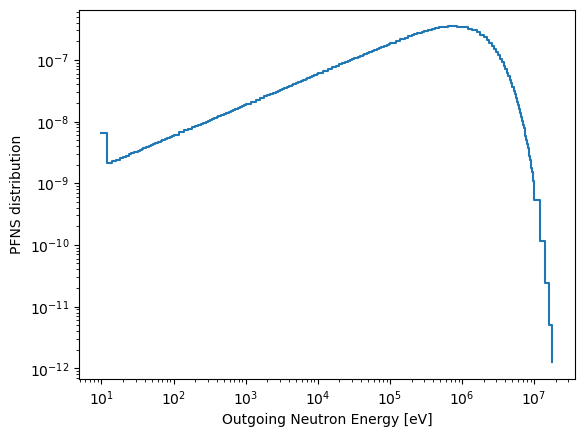

In [75]:
plt.step(pfns.group_boundaries[:-1],pfns.mean_values/bin_widths, where='post')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Outgoing Neutron Energy [eV]")
plt.ylabel("PFNS distribution")

The uncertainty on the PFNS is on the Section object as both relative uncertainty and absolute uncertainty

In [76]:
# relative uncertainty
pfns.uncertainty

array([0.02484764, 0.08474328, 0.08520924, 0.08556569, 0.08584712,
       0.08607528, 0.08626393, 0.08642276, 0.08655836, 0.08667551,
       0.08677786, 0.086868  , 0.08694805, 0.08701973, 0.08708405,
       0.08714275, 0.08719559, 0.08724447, 0.08728881, 0.08732986,
       0.08736803, 0.08740297, 0.08743599, 0.08746638, 0.08749502,
       0.08752177, 0.08754707, 0.08757083, 0.08759341, 0.08761443,
       0.08763451, 0.08765349, 0.08767167, 0.08768896, 0.08770525,
       0.08772085, 0.08773584, 0.08775015, 0.08776384, 0.08777708,
       0.08778953, 0.08780163, 0.08781326, 0.0878242 , 0.08783516,
       0.08481659, 0.0848648 , 0.08533891, 0.08570166, 0.08598866,
       0.08622124, 0.08641368, 0.08657559, 0.08671359, 0.08683275,
       0.08693661, 0.08702791, 0.08710881, 0.08718096, 0.08724562,
       0.08730409, 0.08735673, 0.08740469, 0.0874486 , 0.08748863,
       0.08752554, 0.08755939, 0.08759079, 0.08761968, 0.08764673,
       0.08767171, 0.08769484, 0.08771635, 0.08773657, 0.08775

In [77]:
# absolute uncertainty
pfns.abs_uncertainty

array([3.26314584e-10, 3.57479514e-10, 3.86141419e-10, 4.12823927e-10,
       4.37886757e-10, 4.61594618e-10, 4.84145418e-10, 5.05694762e-10,
       5.26365258e-10, 5.46256366e-10, 5.65450611e-10, 5.84016105e-10,
       6.02010980e-10, 6.19485609e-10, 6.36480960e-10, 6.53039059e-10,
       6.69184565e-10, 6.84955482e-10, 7.00368472e-10, 7.15452302e-10,
       7.30227380e-10, 7.44706646e-10, 7.58914997e-10, 7.72859600e-10,
       7.86559605e-10, 8.00025023e-10, 8.13269936e-10, 8.26302629e-10,
       8.39135294e-10, 8.51772280e-10, 8.64226805e-10, 8.76504436e-10,
       8.88614638e-10, 9.00562070e-10, 9.12352993e-10, 9.23993507e-10,
       9.35491313e-10, 9.46849515e-10, 9.58073044e-10, 9.69168699e-10,
       9.80136706e-10, 9.90985374e-10, 1.00171655e-09, 1.01233198e-09,
       1.02284312e-09, 1.04058252e-08, 1.13203708e-08, 1.22290312e-08,
       1.30748771e-08, 1.38694199e-08, 1.46209579e-08, 1.53358011e-08,
       1.60188392e-08, 1.66739560e-08, 1.73043349e-08, 1.79125766e-08,
      

the relative uncertainty is what is usually plotted

(1000.0, 20000000.0)

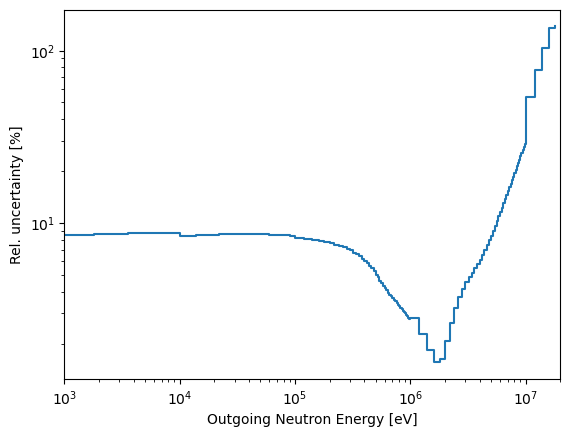

In [78]:
plt.step(pfns.group_boundaries[:-1],100*pfns.uncertainty,where='post')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Outgoing Neutron Energy [eV]")
plt.ylabel("Rel. uncertainty [%]")
plt.xlim(1e3,2e7)

the relative covariance and correlation matrices are attributes, along with the absolute covariance matrix

Text(0.5, 1.0, 'Relative Covariance Matrix')

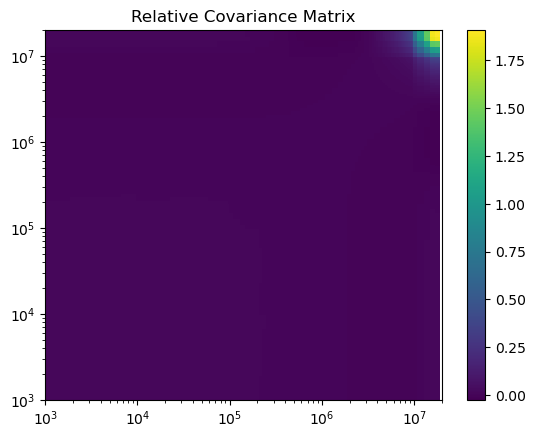

In [81]:
plt.pcolor(pfns.group_boundaries[:-1], pfns.group_boundaries[:-1], pfns.covariance_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,2e7)
plt.ylim(1e3,2e7)
plt.title("Relative Covariance Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

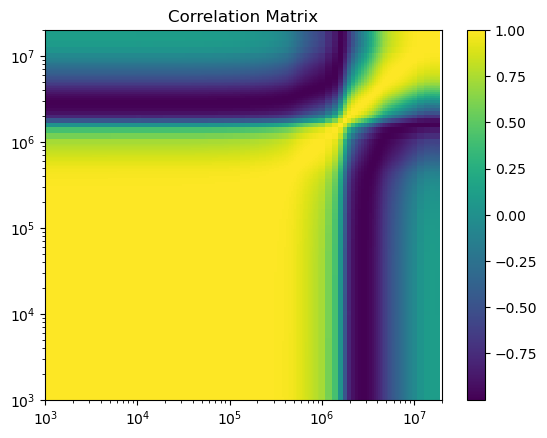

In [82]:
plt.pcolor(pfns.group_boundaries[:-1], pfns.group_boundaries[:-1], pfns.correlation_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,2e7)
plt.ylim(1e3,2e7)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Absolute Covariance Matrix')

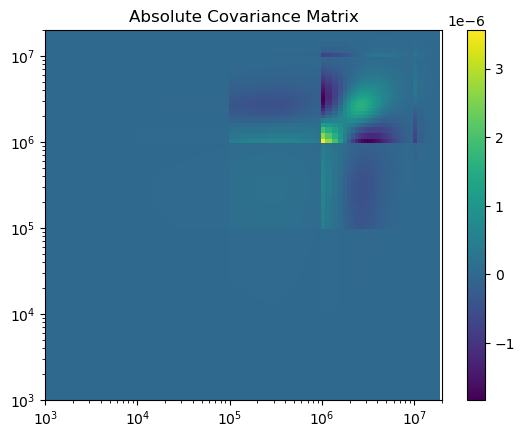

In [83]:
plt.pcolor(pfns.group_boundaries[:-1], pfns.group_boundaries[:-1], pfns.abs_covariance_matrix)
plt.colorbar()
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,2e7)
plt.ylim(1e3,2e7)
plt.title("Absolute Covariance Matrix")